# Plotting rows and columns of molecules with MolsMatrixToGridImage

## Comparing MolsMatrixToGridImage vs. MolsToGridImage

`[MolsMatrixToGridImage()]()`, new in RDKit 2023.09.1, is designed to easily plot a rectangular grid of molecules, that is rows and columns of molecules. `MolsMatrixToGridImage()` builds upon `[MolsToGridImage()]()`. In fact, `MolsMatrixToGridImage()` internally calls `MolsToGridImage()`, so they can output the same images and formats.

The difference is that `MolsMatrixToGridImage()` creates a rectangular row-and-column format by using nested input data structures. Each data substructure represents a row of molecules. `MolsMatrixToGridImage()` automatically pads rows as needed so all rows are the length of the longest row. So you can easily plot molecules in a matrix without having to think about the length of each row.

As a minimal example, if we want to plot a single interhalogen molecule at various cells in a grid, for example to represent a spatial arrangement:

In [16]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage, rdMolDraw2D # , MolsMatrixToGridImage

In [17]:
FCl = Chem.MolFromSmiles("FCl")

both of the following produce the same grid image:

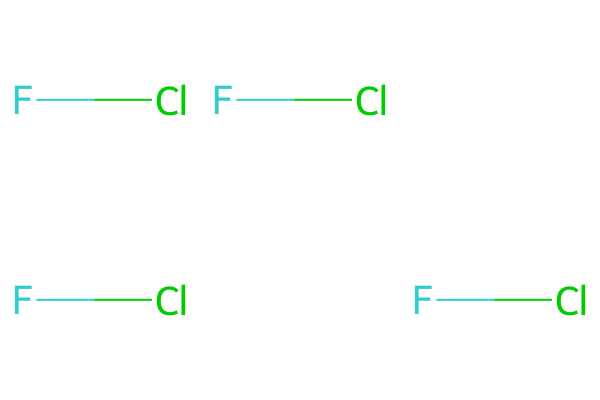

In [18]:
mols = [FCl, FCl, None, FCl, None, FCl]
MolsToGridImage(mols=mols, molsPerRow=3)

(where we had to add the first `None` (null molecule) item to produce the empty cell at the end of the first row)

In [19]:
molsMatrix = [[FCl, FCl], [FCl, None, FCl]]
# imgMatrix = MolsMatrixToGridImage(molsMatrix=molsMatrix)

The only parameter we must provide to `MolsMatrixToGridImage()` is `molsMatrix`.

The advantage of `MolsMatrixToGridImage()` is that you need not manually pad shorter (narrower) rows, and you can provide molecules in a nested format that explicitly identifies each row.

While we the nested data structure we used above for `MolsMatrixToGridImage()` is a list of lists, you can use any iterables, for example a tuple of tuples, or a list of tuples, etc.

### When to use MolsToGridImage vs. MolsMatrixToGridImage

Use `MolsToGridImage()` if you want to plot a series of molecules in a space-efficient manner where the row that each molecule is on is not important.

Use `MolsMatrixToGridImage()` if you want each row of molecules to represent something meaningful, and especially if the number of molecules per row can vary. The columns may or may not have meaning: You could plot an uninterrupted series of molecules in a row in no particular order, or you could assign molecules to columns based on some property--for example, a column may represent a spatial location.

A borderline situation is if each row will have the same number of molecules `n` (`n` = 2 below): you can create the same grid using either
- `MolsToGridImage(molsPerRow=n)`, for example `MolsToGridImage([mol1a, mol1b, mol2a, mol2b, mol3a, mol3b], molsPerRow=2)`.
- `MolsMatrixToGridImage()` with `n` molecules in each row, for example `MolsMatrixToGridImage([[mol1a, mol1b], [mol2a, mol2b], [mol3a, mol3b]])`. You may find this format easier to use because each row is in its own sub-list. Also, you need not explicitly declare the number of molecules per row, so if you later change that number `n`, or have different numbers of molecules on the rows, the grid will automatically adjust accordingly.

## Nested data structures for per-molecule parameters

`MolsMatrixToGridImage()` nests data structures one additional level beyond the analogous parameter in `MolsToGridImage`. The following table compares those parameters for the two functions, where the parameters would produce the same output for their respective functions.

| `MolsToGridImage()`<br>_`MolsMatrixToGridImage()`_ | Name                 | Structure                                  | Example                                                              |
|------------------------------------------------|----------------------|--------------------------------------------|----------------------------------------------------------------------|
| Molecules                                      | mols<br>_molsMatrix_ | Iterable[mol]<br>_Iterable[Iterable[mol]]_ | [FCl, FCl, None, FCl, None, FCl]<br>_[[FCl, FCl], [FCl, None, FCl]]_ |
| Legends                                        |                      |                                            |                                                                      |
| Highlight atoms                                |                      |                                            |                                                                      |
| Highlight bonds                                |                      |                                            |                                                                      |

| `MolsToGridImage()`<br>`MolsMatrixToGridImage()` | Name               | Structure                                | Example                                                            |
|--------------------------------------------------|--------------------|------------------------------------------|--------------------------------------------------------------------|
| Molecules                                        | mols<br>molsMatrix | Iterable[mol]<br>Iterable[Iterable[mol]] | [FCl, FCl, None, FCl, None, FCl]<br>[[FCl, FCl], [FCl, None, FCl]] |
| Legends                                          |                    |                                          |                                                                    |
| Highlight atoms                                  |                    |                                          |                                                                    |
| Highlight bonds                                  |                    |                                          |                                                                    |

| `MolsToGridImage()`<br>`MolsMatrixToGridImage()` | Parameter name     | Structure                                | Example                                                            |
|--------------------------------------------------|--------------------|------------------------------------------|--------------------------------------------------------------------|
| Molecules                                        | mols<br>molsMatrix | Iterable[mol]<br>Iterable[Iterable[mol]] | [FCl, FCl, None, FCl, None, FCl]<br>[[FCl, FCl], [FCl, None, FCl]] |
| Legends                                          |                    |                                          |                                                                    |
| Highlight atoms                                  |                    |                                          |                                                                    |
| Highlight bonds                                  |                    |                                          |                                                                    |

| `MolsToGridImage()`<br>`MolsMatrixToGridImage()` | Values mean                   | Parameter name                                 | Structure                                                   | Example                                                                                                                                                                                    |
|--------------------------------------------------|-------------------------------|------------------------------------------------|-------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Molecules                                        | RDKit molecule                | mols<br>molsMatrix                             | Iterable[mol]<br>Iterable[Iterable[mol]]                    | [FCl, FCl, None, FCl, None, FCl]<br>[[FCl, FCl], [FCl, None, FCl]]                                                                                                                         |
| Legends                                          | Legend text                   | legends<br>legendsMatrix                       | Iterable[str]<br>Iterable[Iterable[str]]                    | ["no highlighting", "bond highlighted", "", "F highlighted", "", "Cl and bond highlighted"]<br>[["no highlighting", "bond highlighted"], ["F highlighted", "", "Cl and bond highlighted"]] |
| Highlight atoms                                  | Indices of atoms to highlight | highlightAtomLists<br>highlightAtomListsMatrix | Iterable[Iterable[int]]<br>Iterable[Iterable[Iterable[Int]] | [[],[], None, [0], None, [1]]<br>[[[],[]], [[0], None, [1]]]                                                                                                                               |
| Highlight bonds                                  | Indices of bonds to highlight | highlightBondLists<br>highlightBondListsMatrix | Iterable[Iterable[int]]<br>Iterable[Iterable[Iterable[Int]] | [[],[0], None, [], None, [0]]<br>[[[],[0]], [[], None, [0]]]                                                                                                                               |

### Requirements for agreement of dimensions of per-molecule parameters

`molsMatrix` sets the dimensions, and any other supplied Matrix (per-molecule) parameters must match those dimensions. In the example above, `molsMatrix` has two rows (sub-lists), so `legendsMatrix`, `highlightAtomListsMatrix`, and `highlightBondListsMatrix` (if supplied) must also have two rows. Also, because the first row (sub-list) of `molsMatrix` has two columns (elements), that must true for those three other parameters. And because the second row (sub-list) of `molsMatrix` has three columns (elements), that must true for those three other parameters.

## Exhaustive example

Here is an example of supplying all parameters to `MolsMatrixToGridImage()`.

In [20]:
legendsMatrix = [["no highlighting", "bond highlighted"], ["F highlighted", None, "Cl and bond highlighted"]]
highlightAtomListsMatrix = [[[],[]], [[0], None, [1]]]
highlightBondListsMatrix = [[[],[0]], [[], None, [0]]]

dopts = rdMolDraw2D.MolDrawOptions()
dopts.addAtomIndices = True

# img_binary = MolsMatrixToGridImage(molsMatrix=molsMatrix, subImgSize=(100, 100), legendsMatrix=legendsMatrix, highlightAtomListsMatrix=highlightAtomListsMatrix, highlightBondListsMatrix=highlightBondListsMatrix, useSVG=False, returnPNG=False, drawOptions=dopts)

Here is the same image created using `MolsToGridImage()`:

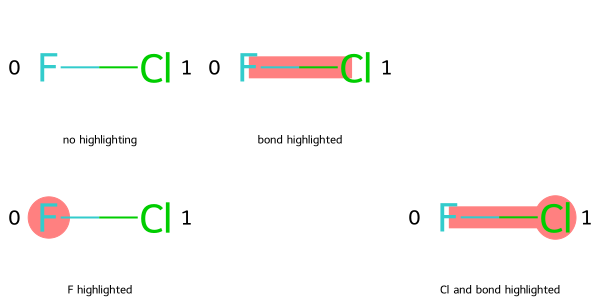

In [30]:
legends = ["no highlighting", "bond highlighted", "", "F highlighted", "", "Cl and bond highlighted"]
highlightAtomLists = [[],[], None, [0], None, [1]]
highlightBondLists = [[],[0], None, [], None, [0]]

MolsToGridImage(mols, molsPerRow=3, subImgSize=(200, 150), legends=legends, highlightAtomLists=highlightAtomLists, highlightBondLists=highlightBondLists, useSVG=False, returnPNG=False, drawOptions=dopts)

Note that, unlike `MolsToGridImage()`, `MolsMatrixToGridImage()` does not take a `molsPerRow` parameter because `MolsMatrixToGridImage()` automatically sets the number of molecules per row to the length of the longest row in `molsMatrix`. Other than that, and the more-nested structure of per-molecule parameters, `MolsMatrixToGridImage()` can accept all the same parameters as `MolsToGridImage()`: `useSVG`, `returnPNG`, and `**kwargs` such as `drawOptions`. Indeed, `MolsMatrixToGridImage()` will simply pass those parameters to `MolsToGridImage()`.

## Use cases

***Ones from my blog: Synthetic accessibility, Mass spec fragmentation tree, MCS and groups off it, retrosynthetic analysis, possibly isotope decay chain (if RDKit can show atomic mass and number to the upper and lower, respectively, left of atoms; and perhaps arrows)

In some cases, each column may have a defined meaning, for example spatial location. In other cases, the columns may be used to space out molecules; for example in the mass spectrometry fragmentation tree, the columns allow horizontal space for each subtree to avoid colliding with an adjacent subtree.

## 